In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('G:/research papers/breast cancer prediction/Wisconsin Diagnosis Breast Cancer(WDBC).csv')

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
X = dataset.iloc[:,2:32] # [all rows, col from index 2 to the last one excluding 'Unnamed: 32']
y = dataset.iloc[:,1] # [all rows, col one only which contains the classes of cancer]

In [7]:
from sklearn.preprocessing import LabelEncoder

print("Before encoding: ")
print(y[100:110])

labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

print("\nAfter encoding: ")
print(y[100:110])

Before encoding: 
100    M
101    B
102    B
103    B
104    B
105    M
106    B
107    B
108    M
109    B
Name: diagnosis, dtype: object

After encoding: 
[1 0 0 0 0 1 0 0 1 0]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from keras.models import Sequential
# from keras.layers import Dense

# def build_classifier(optimizer):
#     classifier = Sequential()
#     classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
#     classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
#     classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
#     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#     classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return classifier
# classifier = KerasClassifier(build_fn = build_classifier)
# parameters = {'batch_size': [1, 5],
#               'epochs': [100, 120],
#               'optimizer': ['adam', 'rmsprop']}
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10)
# grid_search = grid_search.fit(X_train, y_train)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() # Initialising the ANN

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
model.fit(X_train, y_train, batch_size = 1, epochs = 100)

Epoch 1/100
455/455 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.6901
Epoch 2/100
455/455 [==============================] - 0s 814us/step - loss: 0.2304 - accuracy: 0.9516
Epoch 3/100
455/455 [==============================] - 0s 794us/step - loss: 0.1298 - accuracy: 0.9648
Epoch 4/100
455/455 [==============================] - 0s 810us/step - loss: 0.0971 - accuracy: 0.9758
Epoch 5/100
455/455 [==============================] - 0s 806us/step - loss: 0.0990 - accuracy: 0.9802
Epoch 6/100
455/455 [==============================] - 0s 839us/step - loss: 0.0962 - accuracy: 0.9824
Epoch 7/100
455/455 [==============================] - 0s 807us/step - loss: 0.0964 - accuracy: 0.9824
Epoch 8/100
455/455 [==============================] - 0s 911us/step - loss: 0.0972 - accuracy: 0.9824
Epoch 9/100
455/455 [==============================] - 0s 803us/step - loss: 0.0971 - accuracy: 0.9824
Epoch 10/100
455/455 [==============================] - 0s 794us/step - los

In [20]:
from tensorflow.keras.models import load_model

model.save('breast_cancer_model.h5') #Save trained ANN
#classifier = load_model('breast_cancer_model.h5')  #Load trained ANN

In [21]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[67  0]
 [ 3 44]]
Accuracy: 97.36842105263158%


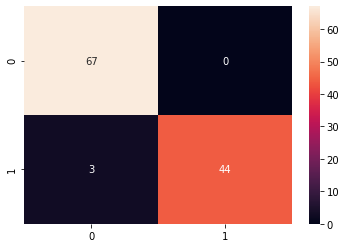

In [25]:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h.png')